Интернет-магазин решил внести изменения в свой сайт и добавил в него больше интерактивности и мелких деталей. Теперь компании необходимо провести A/B тестирование и узнать, изменился ли доход или нет

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import levene

In [38]:
# Загрузка данных
df = pd.read_csv('data/AB_Test_Results.csv')
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


Интернет-магазин решил внести изменения в свой сайт и добавил в него больше интерактивности и мелких деталей. Теперь компании необходимо провести A/B тестирование и узнать, изменился ли доход или нет

In [4]:
df.USER_ID.nunique()

6324

In [3]:
df_control = df[(df.VARIANT_NAME == 'control')]
REVENUE_con = df_control.REVENUE.sum()
df_variant = df[(df.VARIANT_NAME == 'variant')]
REVENUE_var = df_variant.REVENUE.sum()
print(REVENUE_con, REVENUE_var)

643.0 351.47


In [7]:
duplicateDFRow = df[df.duplicated(subset = 'USER_ID', keep = False)].sort_values(by = 'USER_ID')
duplicateDFRow 


,USER_ID,VARIANT_NAME,REVENUE
2406,2,control,0.00
3479,2,control,0.00
7076,2,control,0.00
7409,3,variant,0.00
4145,3,variant,0.00
...,...,...,...
2998,9996,control,0.00
5915,9996,variant,6.46
8970,10000,variant,0.00
8921,10000,control,0.00


In [41]:
temp_ = duplicateDFRow.groupby(by='USER_ID')[['VARIANT_NAME']].value_counts().unstack()
temp_ 

VARIANT_NAME,control,variant
USER_ID,,
2,3.0,NaN
3,1.0,2.0
10,1.0,1.0
11,2.0,NaN
13,2.0,NaN
...,...,...
9982,1.0,1.0
9986,NaN,2.0
9995,NaN,2.0


In [30]:
temp_drop = temp_[(temp_.control.isna() != True) & (temp_.variant.isna() != True)]
temp_drop

VARIANT_NAME,control,variant
USER_ID,,
3,1.0,2.0
10,1.0,1.0
18,1.0,1.0
25,1.0,1.0
40,1.0,1.0
...,...,...
9978,2.0,1.0
9979,2.0,1.0
9982,1.0,1.0


In [42]:
#удаляю строки с ошибозными данными
df = df.loc[~df['USER_ID'].isin(temp_drop.index)]


In [43]:
df_control = df[(df.VARIANT_NAME == 'control')]
REVENUE_con = df_control.REVENUE.sum()
df_variant = df[(df.VARIANT_NAME == 'variant')]
REVENUE_var = df_variant.REVENUE.sum()
print(REVENUE_con, REVENUE_var)

470.56 179.32


In [ ]:
print(f'В датасете {len(df_control) - len(df_control.drop_duplicates(subset="USER_ID"))} дубликатов строк')

In [4]:
df_ = df.groupby(by ='VARIANT_NAME')[['VARIANT_NAME']].value_counts()

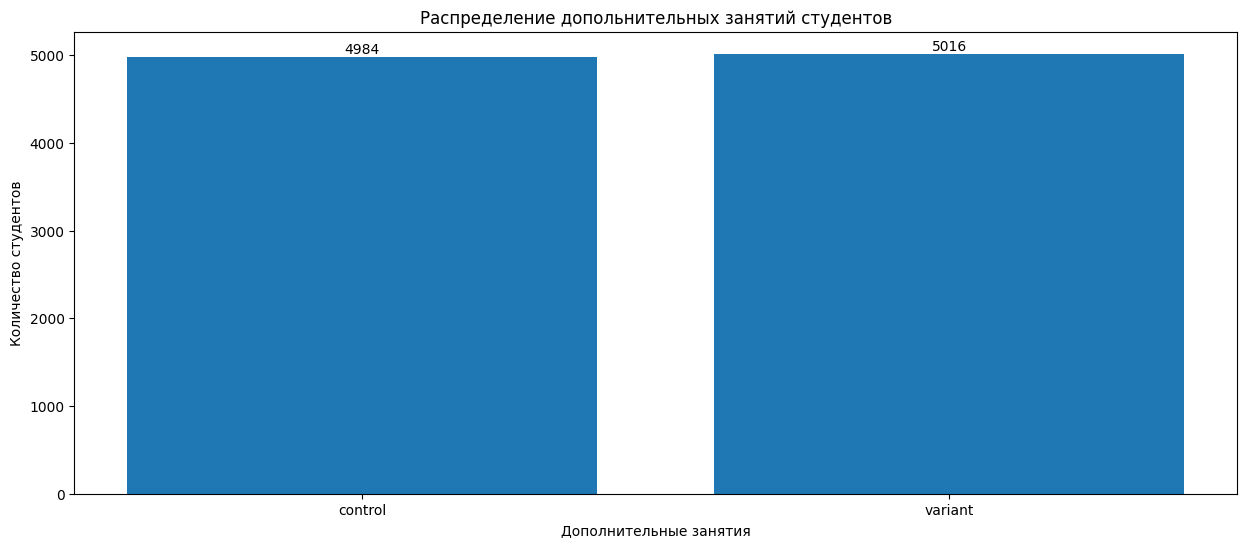

In [5]:
# Визуализация распределения допольнительных занятий студентов до обработки пропусков
df_ = df.groupby(by ='VARIANT_NAME')[['VARIANT_NAME']].value_counts()
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df_.index, height = df_.values) 
ax.set_title('Распределение допольнительных занятий студентов')
ax.set_ylabel('Количество студентов')
ax.set_xlabel('Дополнительные занятия')
ax.bar_label (ax.containers [ 0 ])
plt.show();

In [ ]:
# Визуализация распределения допольнительных занятий студентов до обработки пропусков
df_ = df.groupby(by ='REVENUE')[['REVENUE']].value_counts()
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df_.index, height = df_.values) 
ax.set_title('Распределение допольнительных занятий студентов')
ax.set_ylabel('Количество студентов')
ax.set_xlabel('Дополнительные занятия')
ax.bar_label (ax.containers [ 0 ])
plt.show();